## mixer calibration

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

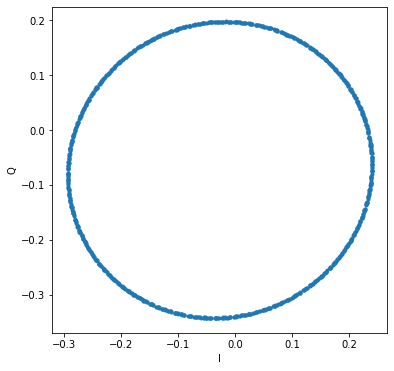

In [32]:
path = '../data/raw/mix_cal/mixer1/'
file_name = 'mix_cal_0'
file = path + file_name + '.h5'

import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

#big_plot_from_file(file, config['ref'][0], config['step'])
I, Q = get_hdf5(file)
plt.figure(figsize=(6,6))
plt.scatter(I[0], Q[0], marker='.')
plt.xlabel('I')
plt.ylabel('Q')
#plt.savefig(path + file_name + '.png', dpi=200, facecolor='white')
plt.show()

## resonances visualization
4 resonances have been found so far: 4.34, 4.37, 5.63134, 5.8627
The last two are used for the acquisition

In [20]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

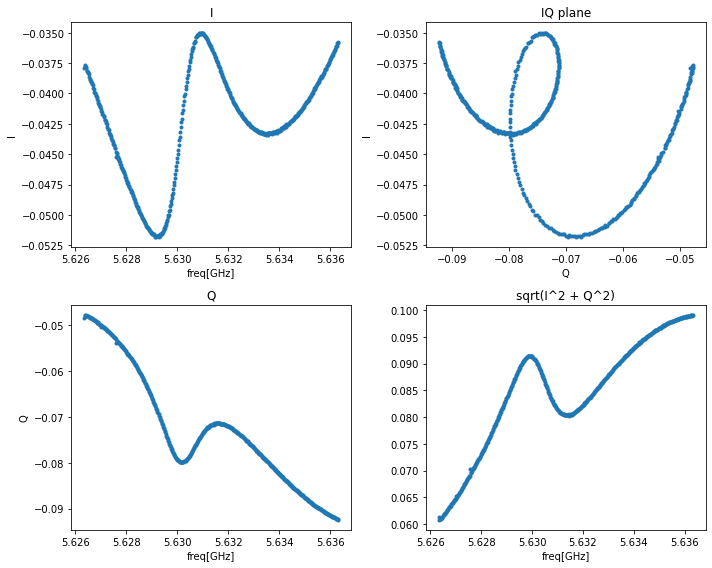

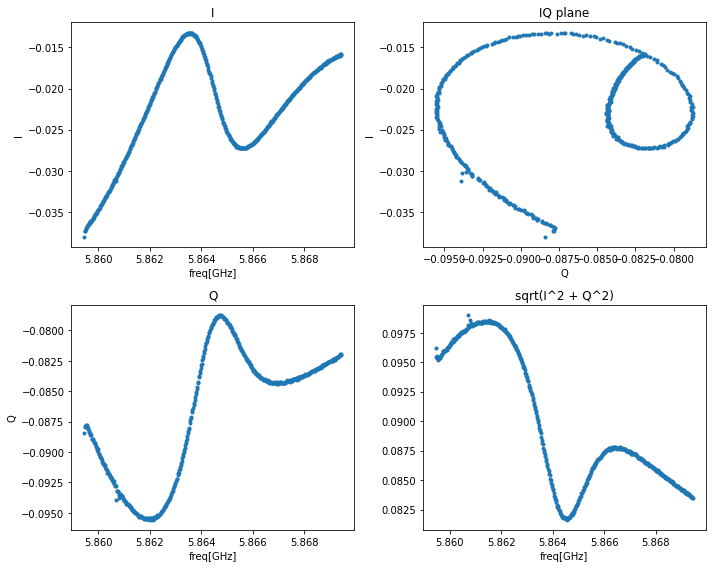

In [43]:
path = '../data/raw/cal_acq/'
file_name = 'scan_res_1'
file = path + file_name + '.h5'

import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

#big_plot_from_file(file, config['ref'][0], config['step'])
I1, Q1, I2, Q2 = get_hdf5_2(file)
big_plot_from_array(I1, Q1, config['ref'][0], config['step'])#, begin=900, end=1100)
big_plot_from_array(I2, Q2, config['ref'][1], config['step'])#, begin=1000, end=1200)

Point found during the falling at position 268 with a frequency of 5.86482.


268

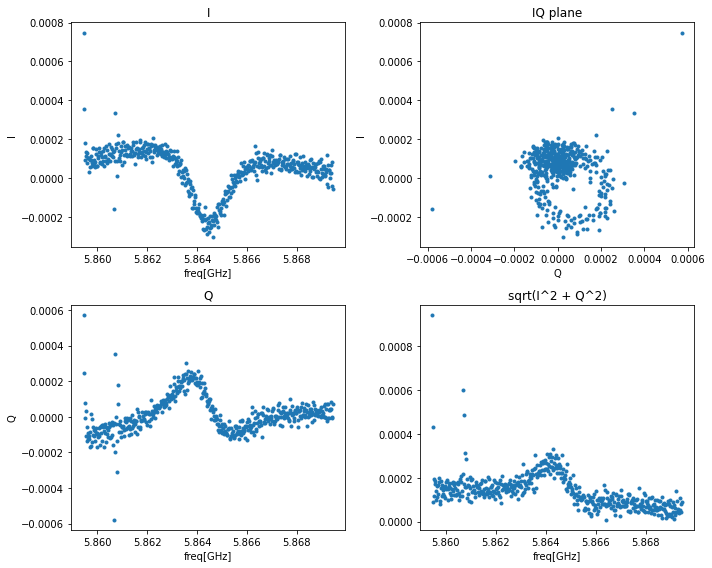

In [62]:
big_plot_from_array(np.gradient(np.array(I2)),np.gradient(np.array(Q2)), config['ref'][1], config['step'])#, begin=900, end=950)
length = check_length(I2, Q2)
x = np.linspace(config['ref'][1] - config['window']*config['step'], config['ref'][1] + (config['window'] - 1)*config['step'], config['window']*2)
der_IQ(x, I2, Q2, begin = 200, end = 300)

## edge acquisition

In [14]:
%load_ext autoreload
%autoreload 2

import h5py
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
path = '../data/raw/edge_acq/'
file_name = 'acq_060522_174423'
file = path + file_name + '.h5'

import json
with open(path + 'config_' + file_name + '.json', 'r') as f:
    config = json.load(f)

I1, Q1, I2, Q2 = get_hdf5_2(file)

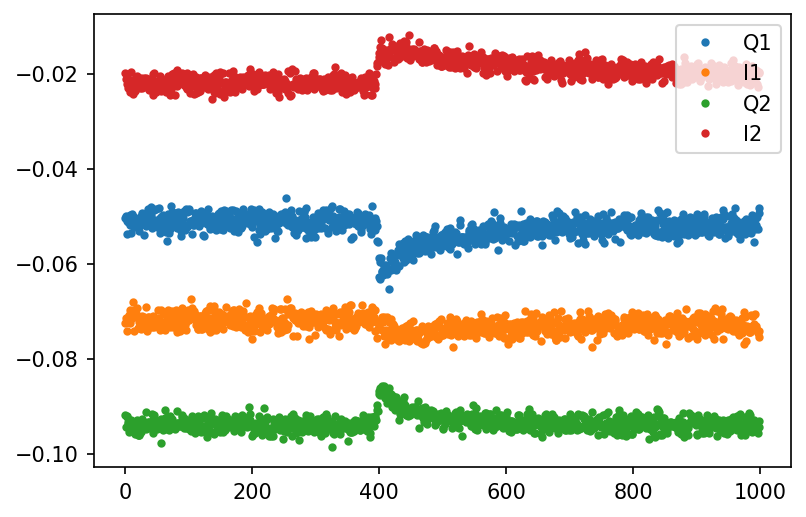

In [67]:
nn=678
plt.figure(dpi=150)
plt.plot(Q1[nn],'.', label='Q1')
plt.plot(I1[nn],'.', label='I1')
plt.plot(Q2[nn],'.', label='Q2')
plt.plot(I2[nn],'.', label='I2')
plt.legend()
plt.show()
#'o-'

## other plots

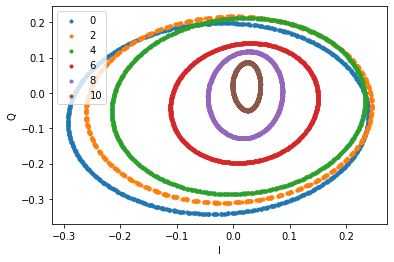

In [68]:
path = '../data/raw/mix_cal/mixer1/'
for i in [0,2,4,6,8,10]:
    file_name = 'mix_cal_' + str(i)
    file = path + file_name + '.h5'
    I, Q = get_hdf5(file)
    #big_plot_from_array(I, Q, config['ref'], config['step'])
    plt.scatter(I[0], Q[0], marker='.', label=str(i))
    plt.xlabel('I')
    plt.ylabel('Q')
plt.legend()
plt.savefig(path+'power.png', dpi=200, facecolor='white')

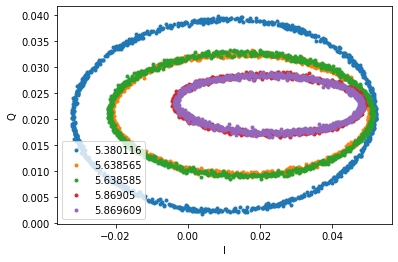

In [19]:
path = '../data/raw/mix_cal/mixer1/'
#[5.345679, 5.380116, 5.638565, 5.869609]
for i in [5.380116, 5.638565, 5.638585, 5.869050, 5.869609]:
    file_name = 'mix_cal_' + str(int(i*1e6))
    file = path + file_name + '.h5'
    I, Q = get_hdf5(file)
    #big_plot_from_array(I, Q, config['ref'], config['step'])
    plt.scatter(I[0], Q[0], marker='.', label=str(i))
    plt.xlabel('I')
    plt.ylabel('Q')
plt.legend()
plt.savefig(path+'frequency1_all.png', dpi=200, facecolor='white')

Text(0, 0.5, 'Q')

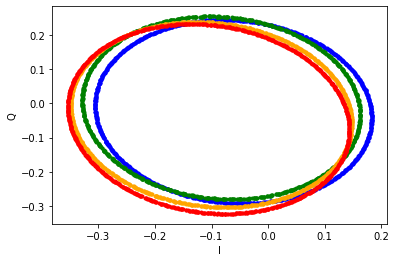

In [214]:
#I, Q = get_hdf5(file)
#big_plot_from_array(I, Q, config['ref'], config['step'])
plt.scatter(I1[0], Q1[0], marker='.', color='b')
plt.scatter(I2[0], Q2[0], marker='.', color='g')
plt.scatter(I3[0], Q3[0], marker='.', color='orange')
plt.scatter(I4[0], Q4[0], marker='.', color='r')
plt.xlabel('I')
plt.ylabel('Q')

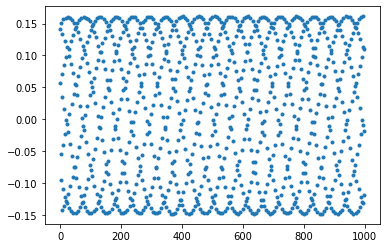

In [247]:
plt.scatter(np.linspace(0,len(Q[0])-1,len(Q[0])),Q[0], marker='.')

## Savgol filter

In [107]:
#upload data
path  = '../data/raw/edge_acq/'
file = 'acq_060522_174423.h5' #os.listdir(path)

I1, Q1, t1, I2, Q2, t2 = get_hdf5_time(path + file)

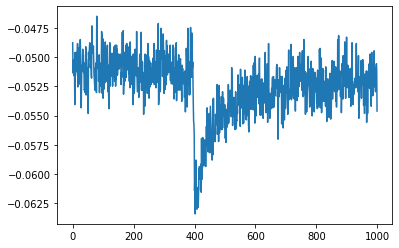

In [108]:
#plot one signal 
plt.plot(Q1[0])
#plt.xlim(450,550)

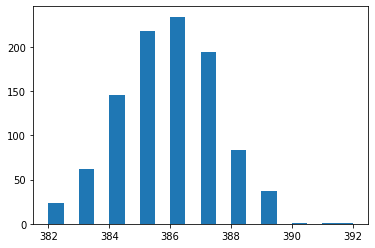

In [151]:
# apply the trigger and plot results 
# a histogram of the signals start indexes 
indexes = np.array(derivative_trigger_matrix(Q1, window_ma=9, wl=60, poly=4, polarity=-1))
#indexes.sort()
plt.hist(indexes, bins = 20)
plt.show()
nn = np.argmin(np.array(indexes))
mm = np.argmax(np.array(indexes))

395
382


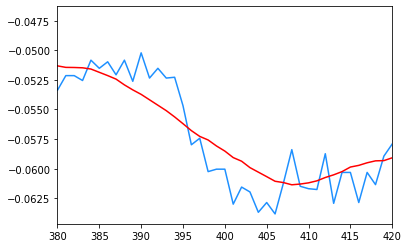

In [177]:
# if a signal has a strange behavior, check here what happened 
ii = nn #mm
window_ma = 21
weights = np.full((1, window_ma), 1/window_ma)
moving_averages = convolve([Q1[ii]], weights, mode='mirror')
first_derivative = np.gradient(moving_averages[0])
std = np.std(first_derivative[0:100]) #100 will become a function of length and pos_ref in PXIe
index_min = first_derivative.argmin()
print(index_min)
rise_points = 0

while first_derivative[index_min - rise_points] < -std:
    rise_points += 1

print(index_min - rise_points)

plt.plot(Q1[ii], color = 'dodgerblue')
plt.plot(moving_averages[0], color='r')
plt.xlim(380,420)
plt.show()

397
387


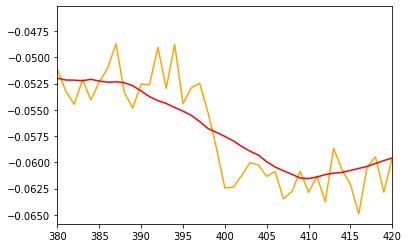

In [178]:
# if a signal has a strange behavior, check here what happened 
ii = mm #mm
weights = np.full((1, window_ma), 1/window_ma)
moving_averages = convolve([Q1[ii]], weights, mode='mirror')
first_derivative = np.gradient(moving_averages[0])
std = np.std(first_derivative[0:100]) #100 will become a function of length and pos_ref in PXIe
index_min = first_derivative.argmin()
print(index_min)
rise_points = 0

while first_derivative[index_min - rise_points] < -std:
    rise_points += 1

print(index_min - rise_points)

plt.plot(Q1[ii], color = 'orange')
plt.plot(moving_averages[0], color='r')
plt.xlim(380,420)
plt.show()

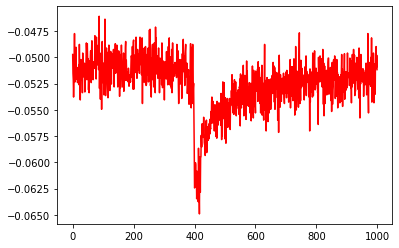

In [183]:
plt.plot(Q1[ii], color='r')
#plt.plot(savgol_filter(Q1[ii], window_length=60, polyorder=4, deriv=0, delta=1, mode='mirror'), color='dodgerblue')
#plt.xlim(480,520)
plt.show()

(380.0, 420.0)

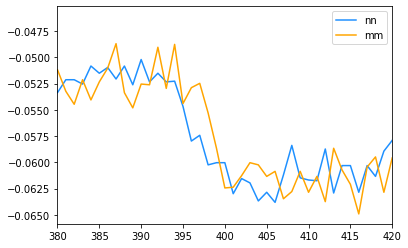

In [180]:
# plot the two most distant signals
plt.plot(Q1[nn], label = 'nn', color = 'dodgerblue')
plt.plot(Q1[mm], label = 'mm', color = 'orange')
plt.legend()
plt.xlim(380,420)

In [181]:
# apply savgol to them 
delta = (indexes - indexes.min()).astype(int)
end = (indexes - indexes.max() - 1).astype(int)

new_Q1 = []

#np.where
for i in range(len(Q1)):
    new_Q1.append(Q1[i][delta[i]:end[i]])

(380.0, 420.0)

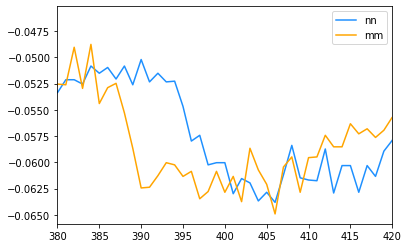

In [182]:
# plot them again and see the magic
plt.plot(new_Q1[nn], label = 'nn', color = 'dodgerblue')
plt.plot(new_Q1[mm], label = 'mm', color = 'orange')
plt.legend()
plt.xlim(380,420)

## join signal and noise

In [204]:
path  = '../data/raw/edge_acq/'
file = 'savgol_acq_060522_180656.h5' #os.listdir(path)

I1, Q1, t1, I2, Q2, t2 = get_hdf5_time(path + file)

path2  = '../data/raw/edge_acq/'
file2 = 'noise_060522_183913.h5' #os.listdir(path)

NI1, NQ1, Nt1, NI2, NQ2, Nt2 = get_hdf5_time(path2 + file2)

In [202]:
a = np.concatenate((np.array(I1), np.array(NI1[:,:len(I1[0])])), axis=0)
b = np.concatenate((np.array(Q1), np.array(NQ1[:,:len(I1[0])])), axis=0)
c = np.concatenate((np.array(I2), np.array(NI2[:,:len(I1[0])])), axis=0)
d = np.concatenate((np.array(Q2), np.array(NQ2[:,:len(I1[0])])), axis=0)

In [203]:
t = np.linspace(0, len(a)-1, len(a))
t.shape

(2000,)

In [205]:
storage_hdf5(path + 'tot_' + file, 'i_matrix_ch0', a, 'q_matrix_ch0', b, 'i_matrix_ch1', c, 'q_matrix_ch1', d, 'timestamp_ch0', t, 'timestamp_ch1', t )